<a href="https://colab.research.google.com/github/Amit-Padye/-Predicting-sales-of-a-major-store-chain-Rossmann/blob/main/Project_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/analytic/Data & Resources/Rossmann Stores Data.csv',parse_dates=['Date'])





/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

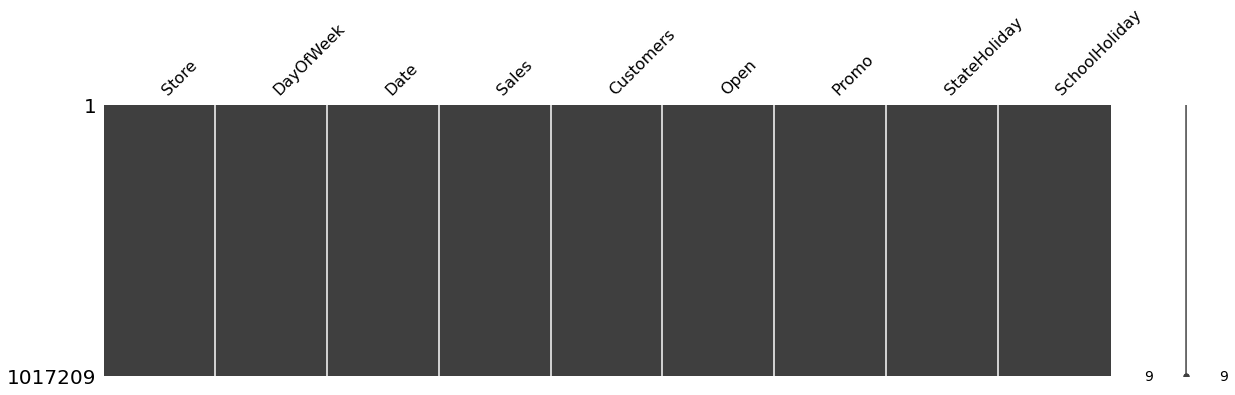

In [ ]:
import missingno as m
m.matrix(df1,figsize=(20,5))

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


# Checking Each column

**1.Day of week**


In [ ]:
df1.groupby('DayOfWeek')['Sales'].sum()

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

From above sum of sales at day 1 is higher and at day 7 it is lower

**2.customors**

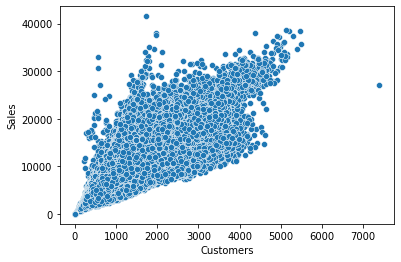

In [ ]:
sns.scatterplot(x='Customers',y='Sales',data=df1)

sales and customors are varying linerly. Customrs is important parameter do predict sales

**3.Open**

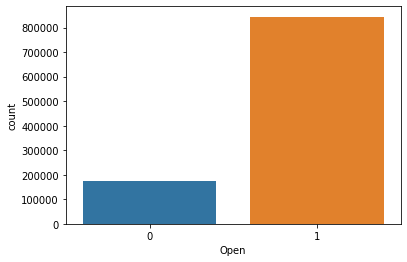

In [ ]:
sns.countplot(x='Open',data=df1)

Most of the time store is open so we have to take care at train test spliting 

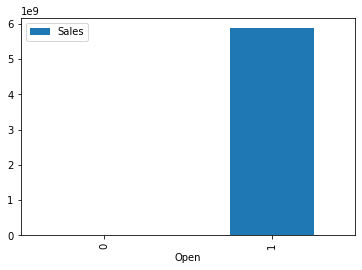

In [ ]:
sum=df1.groupby("Open")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

4.**Promo**

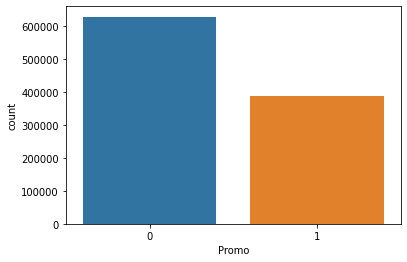

In [ ]:
sns.countplot(x='Promo',data=df1)


In [ ]:
sum=df1.groupby("Promo")['Sales'].sum().to_frame()
sum

,Sales
Promo,
0,2771974337
1,3101206286


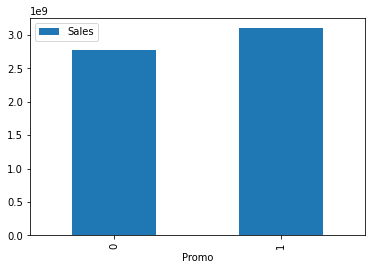

In [ ]:
sum.plot(kind='bar')
plt.show()

Almost equal sun of sales 

**StateHoliday**

In [ ]:
df1["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
df1["StateHoliday"] = df1["StateHoliday"].astype(str).astype(str)

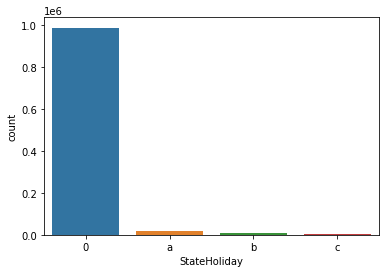

In [ ]:
sns.countplot(x='StateHoliday',data=df1)

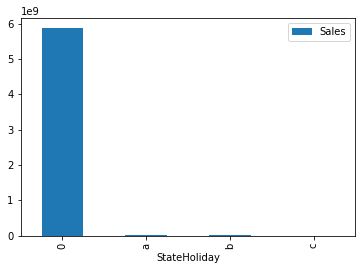

In [ ]:
sum=df1.groupby("StateHoliday")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

In [ ]:
label=pd.get_dummies(df1['StateHoliday'],drop_first=True)
df1=pd.concat([df1,label],axis=1)
df1=df1.drop(['StateHoliday'],axis=1)

**SchoolHoliday**

In [ ]:
df1['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

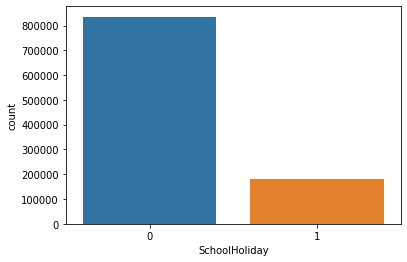

In [ ]:
sns.countplot(x='SchoolHoliday',data=df1)


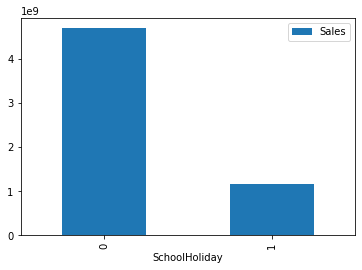

In [ ]:
sum=df1.groupby("SchoolHoliday")['Sales'].sum().to_frame()
sum.plot(kind='bar')
plt.show()

**Date**

In [ ]:
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Year']=df1['Date'].apply(lambda x:x.year)

In [ ]:
df1=df1.drop(['Date'],axis=1)


In [ ]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,a,b,c,Month,Year
0,1,5,5263,555,1,1,1,0,0,0,7,2015
1,2,5,6064,625,1,1,1,0,0,0,7,2015
2,3,5,8314,821,1,1,1,0,0,0,7,2015
3,4,5,13995,1498,1,1,1,0,0,0,7,2015
4,5,5,4822,559,1,1,1,0,0,0,7,2015


Heat **Map**

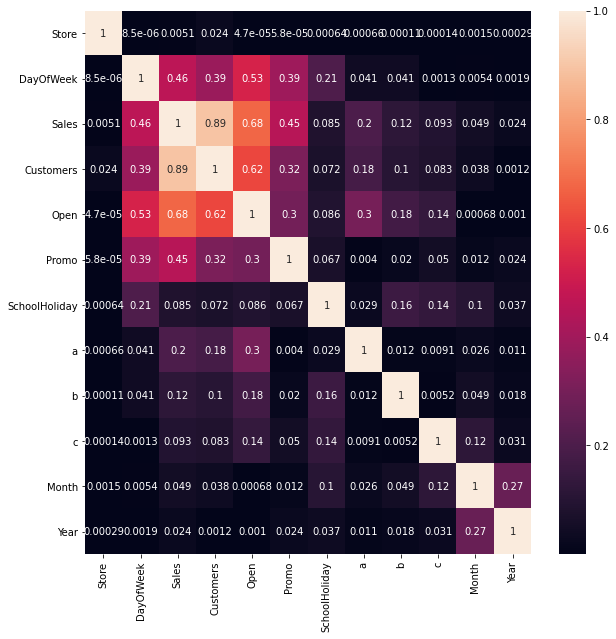

In [ ]:
plt.figure(figsize=(10,10))
cor=abs(df1.corr())
sns.heatmap(cor,annot=True)

**Obsevations**



1.   Sales is highly Correlated with customor (0.89 corr).
2.   SchoolHoliday month and year have very low correlation with sales.
3.   No multicolinearity



# Store Data

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/analytic/Data & Resources/store.csv')

In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


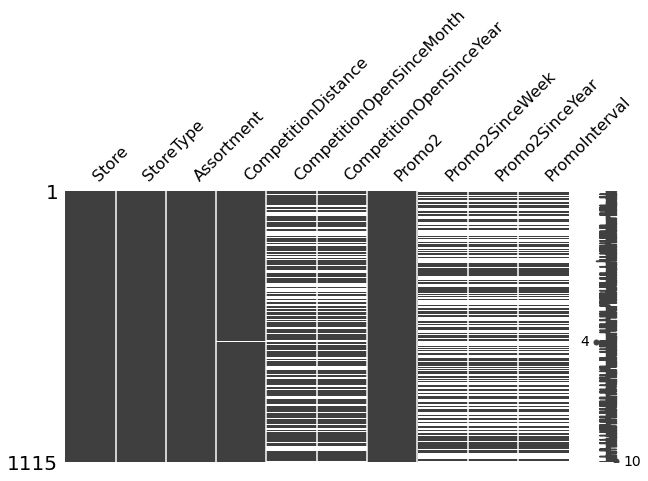

In [ ]:
m.matrix(df2,figsize=(10,5))

In [ ]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Analysis of each column**

1.**Store** **type**

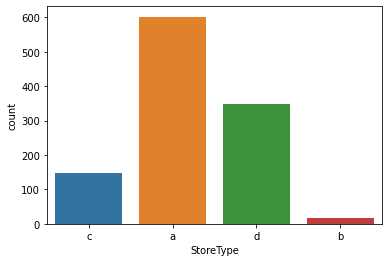

In [ ]:
sns.countplot(x='StoreType',data=df2)

There are 4 type of store.maximum stores are in catogory a

2.**Assortment**

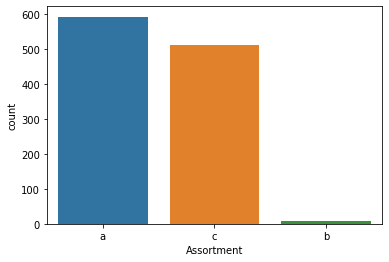

In [ ]:
sns.countplot(x='Assortment',data=df2)


Most of the store have basic assortment.There are very low stores who have extended assortment

**3.CompetitionDistance**        

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


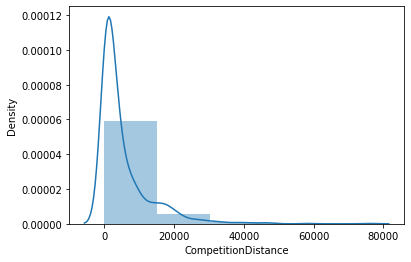

In [ ]:
sns.distplot(df2['CompetitionDistance'],kde=True,bins=5)

In [ ]:
df2['CompetitionDistance'].mean()

5404.901079136691

In [ ]:
df2['CompetitionDistance'].fillna(df2['CompetitionDistance'].mean(),inplace=True)

In [ ]:
df2['CompetitionDistance'].isnull().sum()

0

**4.CompetitionOpenSinceMonth**  

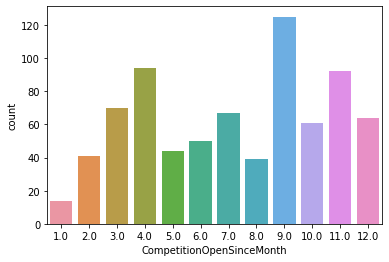

In [ ]:
sns.countplot(x='CompetitionOpenSinceMonth',data=df2)


In [ ]:
df2['CompetitionOpenSinceMonth'].median()

8.0

In [ ]:
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].median(),inplace=True)


In [ ]:
df2['CompetitionDistance'].isnull().sum()


0

**CompetitionOpenSinceYear**

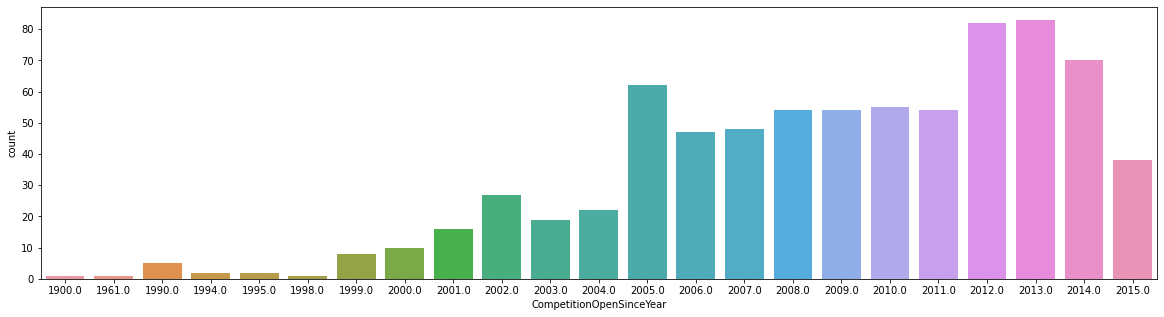

In [ ]:
plt.figure(figsize=(20,5))

sns.countplot(x='CompetitionOpenSinceYear',data=df2)


In [ ]:
df2['CompetitionOpenSinceYear'].median()


2010.0

In [ ]:
df2['CompetitionOpenSinceYear'].fillna(int(df2['CompetitionOpenSinceYear'].median()),inplace=True)


In [ ]:
df2['CompetitionOpenSinceYear'].isna().sum()

0

**Promo2**                     

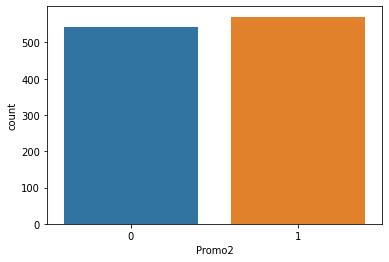

In [ ]:
sns.countplot(x='Promo2',data=df2)


**Promo2SinceWeek**            

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


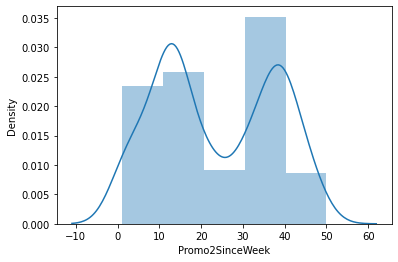

In [ ]:
sns.distplot(df2['Promo2SinceWeek'],kde=True,bins=5)


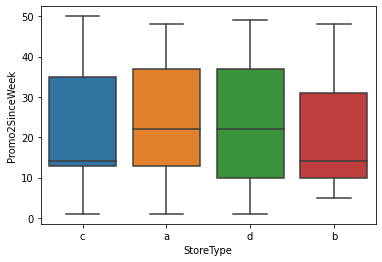

In [ ]:
sns.boxplot(x='StoreType',y='Promo2SinceWeek',data=df2)


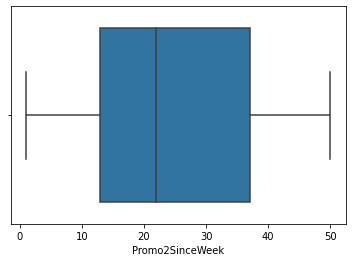

In [ ]:
sns.boxplot(x='Promo2SinceWeek',data=df2)

In [ ]:
df2['Promo2SinceWeek'].mean()

23.595446584938703

In [ ]:
df2['Promo2SinceWeek'].fillna(int(df2['Promo2SinceWeek'].mean()),inplace=True)


In [ ]:
 df2['Promo2SinceWeek'].isnull().sum()

0

**Promo2SinceYear**

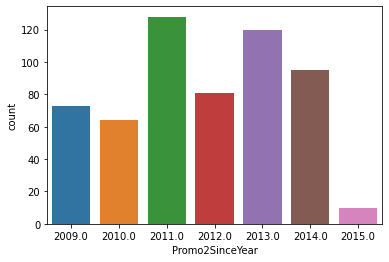

In [ ]:
sns.countplot(x='Promo2SinceYear',data=df2)

In [ ]:
df2['Promo2SinceYear'].fillna(int(df2['Promo2SinceYear'].mode()),inplace=True)


In [ ]:
df2['Promo2SinceYear'].isna().sum()

0

**PromoInterval**

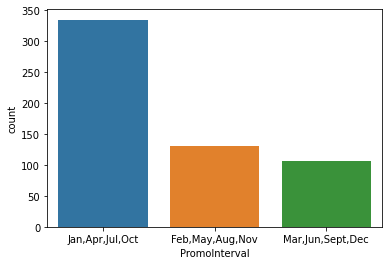

In [ ]:
sns.countplot(x='PromoInterval',data=df2)

In [ ]:
df2['PromoInterval'].value_counts().index[0]

'Jan,Apr,Jul,Oct'

In [ ]:
df2['PromoInterval'].fillna(df2['PromoInterval'].value_counts().index[0],inplace=True)

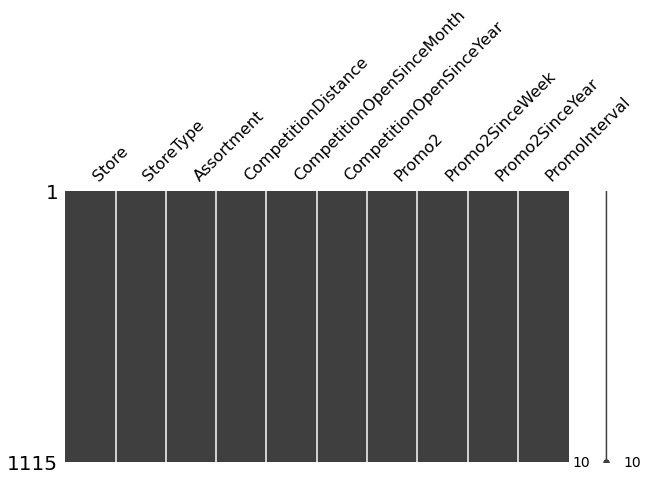

In [ ]:
m.matrix(df2,figsize=(10,5))

**Dummy variable trap for catogarical feature**

In [ ]:
cat=['StoreType','Assortment','PromoInterval']
for col in cat:
   a= df2[col]
   print(col)
   label=pd.get_dummies(a,drop_first=True)
   df2=pd.concat([df2,label],axis=1)


StoreType
Assortment
PromoInterval


In [ ]:
df2=df2.drop(['StoreType','Assortment','PromoInterval'],axis=1)

In [ ]:
df2.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,b,c,d,b,c,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,0,0,0,0,0,1,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,0,0,0,0,0,1,0
3,4,620.0,9.0,2009.0,0,23.0,2011.0,0,1,0,0,1,1,0
4,5,29910.0,4.0,2015.0,0,23.0,2011.0,0,0,0,0,0,1,0


In [ ]:
final_df=df1.merge(df2, left_on='Store', right_on='Store')

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,a,b_x,c_x,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,b_y,c_y,d,b_y,c_y,"Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,5020,546,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,4782,523,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,5011,560,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,6102,612,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0


In [ ]:
'StoreType','Assortment','PromoInterval'

('StoreType', 'Assortment', 'PromoInterval')

In [ ]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'a', 'b_x', 'c_x', 'Month', 'Year',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'b_y', 'c_y', 'd', 'b_y', 'c_y', 'Jan,Apr,Jul,Oct',
       'Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
final_df.columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday-a', 'StateHoliday-b', 'StateHoliday-c', 'Month', 'Year',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType-b', 'StoreType-c', 'StoreType-d', 'Assortment-b', 'Assortment-c', 'PromoInterval1',
       'PromoInterval']

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday-a,StateHoliday-b,StateHoliday-c,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType-b,StoreType-c,StoreType-d,Assortment-b,Assortment-c,PromoInterval1,PromoInterval
0,1,5,5263,555,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,5020,546,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,4782,523,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,5011,560,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,6102,612,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0


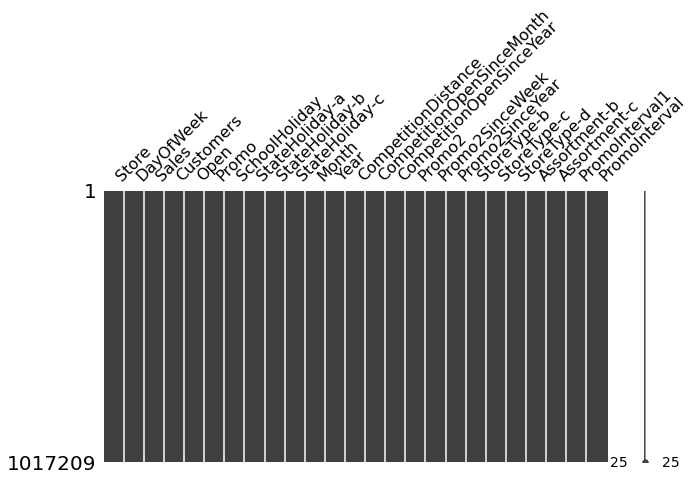

In [ ]:
m.matrix(final_df,figsize=(10,5))

In [ ]:
x=final_df.drop(['Sales'],axis=1)
y=final_df['Sales']

In [ ]:
x

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StateHoliday-a,StateHoliday-b,StateHoliday-c,Month,Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType-b,StoreType-c,StoreType-d,Assortment-b,Assortment-c,PromoInterval1,PromoInterval
0,1,5,555,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
1,1,4,546,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
2,1,3,523,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
3,1,2,560,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
4,1,1,612,1,1,1,0,0,0,7,2015,1270.0,9.0,2008.0,0,23.0,2011.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,339,1,0,1,0,0,0,1,2013,5350.0,8.0,2010.0,1,22.0,2012.0,0,0,1,0,1,0,1
1017205,1115,5,326,1,0,1,0,0,0,1,2013,5350.0,8.0,2010.0,1,22.0,2012.0,0,0,1,0,1,0,1
1017206,1115,4,300,1,0,1,0,0,0,1,2013,5350.0,8.0,2010.0,1,22.0,2012.0,0,0,1,0,1,0,1
1017207,1115,3,305,1,0,1,0,0,0,1,2013,5350.0,8.0,2010.0,1,22.0,2012.0,0,0,1,0,1,0,1


# Model Preparation

**xgBoost model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.20)

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr=XGBRegressor()
model=xgbr.fit(x_train,y_train)

[07:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred=xgbr.predict(x_test)

In [ ]:
xgbr.score(x_train,y_train)

0.9393684634660674

In [ ]:
xgbr.score(x_test,y_test)

0.9383800563078517

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9383800563078516

**Feature Importanse**

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 10.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491630 sha256=3243de46ce3a9604e3123d985fe4786f88e12b0cbad89be2f50a5a2ff341aa18
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

In [ ]:
x.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday-a', 'StateHoliday-b', 'StateHoliday-c', 'Month', 'Year',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType-b', 'StoreType-c', 'StoreType-d',
       'Assortment-b', 'Assortment-c', 'PromoInterval1', 'PromoInterval'],
      dtype='object')

In [ ]:
explainer=shap.TreeExplainer(model,x_test)
shap_values=explainer.shap_values(x_test)


100%|===================| 203406/203442 [04:13<00:00]       

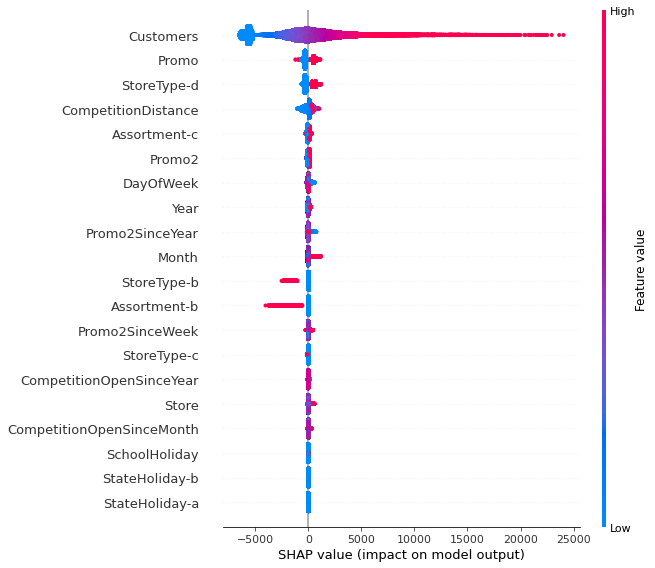

In [ ]:
shap.summary_plot(shap_values,x_test,feature_names=x.columns)

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1=regressor.predict(x_test)
a=r2_score(y_test,y1)

In [ ]:
a

0.9005835542574442

**XGBooost hyper parameter tunning**

In [ ]:
param={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,11,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgbr=XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(xgbr,param_distributions=param,n_iter=5,n_jobs=-1,cv=5,verbose=5,scoring='neg_mean_squared_error')

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 18.7min finished


[08:03:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5}

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgbr=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=15, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=15, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model=xgbr.fit(x_train,y_train)

[08:05:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgbr.score(x_train,y_train)

0.9961745189523477

In [ ]:
y_pred=xgbr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9892690908255913